In [1]:
import subprocess as sp
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns  # for aesthetic

import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import neuraltda.simpComp as sc
import numpy as np
import tempfile
import h5py as h5
import glob
import os
from importlib import reload
import tqdm
%matplotlib inline

sns.set_style('ticks')

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
winsize = 10.0
segment_info = [0, 0]
pover = 0.5
block_path = '/home/brad/krista/B1083/P03S03/'
#block_path = '/home/brad/krista/B1235/P02S01/'
# Bin data
bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good', 'MUA'], dt_overlap=pover*winsize, comment='fulltrial')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print(bdf)

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned


In [3]:
thresh = 13.0
nsamples = 30

nperms=None
ncellsperm=0
dims = [0,1,2,3]
twin = np.linspace(0, 6000, 100)
windt = winsize
dtovr=pover*windt

stim_dict = {}
stim_shuffled_dict = {}
stim_scm_dict = {}
stim_betticurve_dict = {}
stim_shuffled_betticurve_dict = {}

# compute real and shuffled betti curves
(bc, t, tms) = tp2.compute_betti_curves('ForSCMControl', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr)
(bc_shuff, t, tms) = tp2.compute_betti_curves('ForSCMControl-Shuffle', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr, shuffle=True)

In [4]:
reload(tp2)
# compute real and shuffled betti curves - TrialAverage
print('Computing trial average')
(bc_tavg, t, tms) = tp2.compute_trialaverage_betti_curves('ForSCMControl', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr)
(bc_tavg_shuff, t, tms) = tp2.compute_trialaverage_betti_curves('ForSCMControl-Shuffle', block_path, bdf, thresh, nperms, ncellsperm, dims, twin, windt, dtovr, shuffle=True)

Computing trial average


In [ ]:
bc['I_40k'].shape

In [ ]:
reload(tp2)
with h5.File(bdf, 'r') as bdff:
    stims = bdff.keys()
    for stim in stims:
        print(stim)
        stim_poptens = tp2.extract_population_tensor(bdf, stim)
        ntrials = tp2.num_trials(stim_poptens)
        stim_scm_dat= []
        for trial in tqdm.tqdm(range(ntrials)):
            scm_bettis = tp2.calc_scm_betti_distribution(stim_poptens, thresh, trial, nsamples)
        
            stim_scm_dat.append(scm_bettis)
        stim_scm_dict[stim] = stim_scm_dat

In [26]:
def plot_scm_distribution(scm_bettis, trial, bettinum, ax=None, **kwargs):
    
    scm_trial_bettis = scm_bettis[trial]
    bettivals = []
    try:
        for x in scm_trial_bettis:
            try:
                bettivals.append(x[0][bettinum])
            except IndexError:
                bettivals.append(0)
    except IndexError:
        bettivals = [x[bettinum] for x in scm_trial_bettis]
    bettivals2 = []
    for x in bettivals:
        if type(x) is not list:
            bettivals2.append(x)
        else:
            bettivals2.append(x[0])
    #print(bettivals)
    ax.hist(bettivals2, 20, normed=1, **kwargs)

In [9]:
# average over all trials
import tqdm
thresh = 13.0
nsamples = 200
stim_dict = {}
stim_shuffled_dict = {}
stim_scm_dict = {}
stim_betticurve_dict = {}
stim_shuffled_betticurve_dict = {}
with h5.File(bdf, 'r') as bdff:
    stims = bdff.keys()
    for stim in tqdm.tqdm(stims):
        #print(stim)
        trial=0
        stim_poptens = tp2.extract_population_tensor(bdf, stim)
        ntrials = tp2.num_trials(stim_poptens)
        stim_scm_dat= []
        stim_trialavg_poptens = np.mean(stim_poptens, axis=2)[:, :, np.newaxis]     
        scm_bettis = tp2.calc_scm_betti_distribution(stim_trialavg_poptens, thresh, trial, nsamples)
        stim_scm_dict[stim] = scm_bettis



  0%|          | 0/8 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Extracting Population Activity Tensor...
Stim: I_40k, Clusters:None




1it [12:57, 777.87s/it]

2it [12:58, 544.63s/it]

3it [12:58, 381.38s/it]

4it [12:59, 267.07s/it]

5it [12:59, 187.07s/it]

6it [12:59, 131.08s/it]

7it [13:00, 91.89s/it] 

8it [13:00, 64.45s/it]

9it [13:01, 45.24s/it]

10it [13:01, 31.78s/it]

11it [13:01, 22.37s/it]

12it [13:02, 15.79s/it]

13it [13:02, 11.16s/it]

14it [13:03,  7.93s/it]

15it [13:03,  5.67s/it]

16it [13:03,  4.09s/it]

17it [13:04,  2.97s/it]

18it [13:04,  2.20s/it]

19it [13:05,  1.66s/it]

20it [13:05,  1.27s/it]

21it [13:05,  1.01s/it]

22it [13:06,  1.21it/s]

23it [13:06,  1.46it/s]

24it [13:07,  1.67it/s]

25it [13:07,  1.88it/s]

26it [13:07,  2.02it/s]

27it [13:08,  2.14it/s]

28it [13:08,  2.25it/s]

29it [13:09,  2.36it/s]

30it [13:09,  2.42it/s]

31it [13:09,  2.47it/s]

32it [13:10,  2.46it/s]

33it [13:10,  2.47it/s]

34it [13:11,  2.38it/s]

35it [13:11,  2.43it/s]

36it [13:11,  2.50it/s]

37it [13:12,  2.48it/s]

38it [13:12,  2.33it/s]

39it [13:13,  2.36it/s]

40it [13:13,  2.45it/s]



Extracting Population Activity Tensor...
Stim: J_40k, Clusters:None




1it [09:05, 545.72s/it]

3it [09:05, 382.03s/it]

5it [09:06, 267.45s/it]

7it [09:06, 187.24s/it]

9it [09:06, 131.10s/it]

11it [09:06, 91.80s/it]

13it [09:06, 64.28s/it]

15it [09:06, 45.03s/it]

17it [09:07, 31.54s/it]

19it [09:07, 22.11s/it]

21it [09:07, 15.50s/it]

23it [09:07, 10.88s/it]

25it [09:07,  7.64s/it]

27it [09:08,  5.38s/it]

29it [09:08,  3.79s/it]

31it [09:08,  2.68s/it]

33it [09:08,  1.90s/it]

35it [09:08,  1.36s/it]

37it [09:08,  1.02it/s]

39it [09:09,  1.41it/s]

41it [09:09,  1.91it/s]

43it [09:09,  2.55it/s]

45it [09:09,  3.31it/s]

47it [09:09,  4.20it/s]

49it [09:09,  5.19it/s]

51it [09:10,  6.18it/s]

53it [09:10,  7.09it/s]

55it [09:10,  7.98it/s]

57it [09:10,  8.68it/s]

59it [09:10,  9.29it/s]

61it [09:11,  9.77it/s]

63it [09:11,  9.97it/s]

65it [09:11, 10.38it/s]

67it [09:11, 10.59it/s]

69it [09:11, 10.79it/s]

71it [09:11, 10.76it/s]

73it [09:12, 10.72it/s]

75it [09:12, 10.57it/s]

77it [09:12, 10.24it/s]

79it [09:12, 10.27it/s]

Extracting Population Activity Tensor...
Stim: K_40k, Clusters:None




1it [09:24, 564.72s/it]

2it [09:24, 395.35s/it]

3it [09:25, 276.80s/it]

4it [09:25, 193.81s/it]

5it [09:25, 135.72s/it]

6it [09:25, 95.05s/it] 

7it [09:25, 66.59s/it]

8it [09:25, 46.66s/it]

9it [09:26, 32.72s/it]

10it [09:26, 22.96s/it]

11it [09:26, 16.12s/it]

12it [09:26, 11.33s/it]

13it [09:26,  7.98s/it]

14it [09:26,  5.64s/it]

15it [09:27,  4.00s/it]

16it [09:27,  2.85s/it]

17it [09:27,  2.05s/it]

18it [09:27,  1.48s/it]

19it [09:27,  1.09s/it]

20it [09:27,  1.23it/s]

21it [09:28,  1.60it/s]

22it [09:28,  2.05it/s]

23it [09:28,  2.56it/s]

24it [09:28,  3.04it/s]

25it [09:28,  3.53it/s]

26it [09:29,  3.97it/s]

27it [09:29,  4.39it/s]

28it [09:29,  4.81it/s]

29it [09:29,  4.96it/s]

30it [09:29,  5.21it/s]

31it [09:29,  5.27it/s]

32it [09:30,  5.39it/s]

33it [09:30,  5.50it/s]

34it [09:30,  5.48it/s]

35it [09:30,  5.46it/s]

36it [09:30,  5.55it/s]

37it [09:30,  5.64it/s]

38it [09:31,  5.60it/s]

39it [09:31,  5.65it/s]

40it [09:31,  5.52it/s]

4

Extracting Population Activity Tensor...
Stim: L_40k, Clusters:None




1it [04:20, 260.94s/it]

2it [04:21, 182.75s/it]

3it [04:21, 128.01s/it]

4it [04:21, 89.69s/it] 

5it [04:22, 62.88s/it]

6it [04:22, 44.10s/it]

7it [04:22, 30.96s/it]

8it [04:23, 21.77s/it]

9it [04:23, 15.33s/it]

10it [04:23, 10.82s/it]

11it [04:23,  7.66s/it]

12it [04:24,  5.45s/it]

13it [04:24,  3.91s/it]

14it [04:24,  2.83s/it]

15it [04:25,  2.07s/it]

16it [04:25,  1.54s/it]

17it [04:25,  1.17s/it]

18it [04:26,  1.08it/s]

19it [04:26,  1.36it/s]

20it [04:26,  1.65it/s]

21it [04:27,  1.95it/s]

22it [04:27,  2.19it/s]

23it [04:27,  2.45it/s]

24it [04:27,  2.67it/s]

25it [04:28,  2.81it/s]

26it [04:28,  2.94it/s]

27it [04:28,  2.98it/s]

28it [04:29,  3.01it/s]

29it [04:29,  3.05it/s]

30it [04:29,  3.11it/s]

31it [04:30,  3.19it/s]

32it [04:30,  3.26it/s]

33it [04:30,  3.28it/s]

34it [04:31,  3.22it/s]

35it [04:31,  3.33it/s]

36it [04:31,  3.30it/s]

37it [04:31,  3.31it/s]

38it [04:32,  3.27it/s]

39it [04:32,  3.29it/s]

40it [04:32,  3.27it/s]

41i

Extracting Population Activity Tensor...
Stim: M_40k, Clusters:None




1it [11:48, 708.88s/it]

2it [11:49, 496.26s/it]

3it [11:49, 347.42s/it]

4it [11:49, 243.24s/it]

5it [11:49, 170.31s/it]

6it [11:49, 119.25s/it]

7it [11:49, 83.52s/it] 

8it [11:49, 58.50s/it]

9it [11:49, 40.99s/it]

10it [11:50, 28.74s/it]

11it [11:50, 20.16s/it]

12it [11:50, 14.15s/it]

13it [11:50,  9.94s/it]

14it [11:50,  7.01s/it]

15it [11:50,  4.95s/it]

16it [11:50,  3.51s/it]

17it [11:51,  2.50s/it]

18it [11:51,  1.79s/it]

19it [11:51,  1.30s/it]

20it [11:51,  1.06it/s]

21it [11:51,  1.41it/s]

22it [11:51,  1.87it/s]

23it [11:51,  2.42it/s]

24it [11:52,  3.04it/s]

25it [11:52,  3.65it/s]

26it [11:52,  4.27it/s]

27it [11:52,  4.62it/s]

28it [11:52,  5.06it/s]

29it [11:52,  5.38it/s]

30it [11:52,  5.62it/s]

31it [11:53,  5.78it/s]

32it [11:53,  6.01it/s]

33it [11:53,  6.25it/s]

34it [11:53,  6.37it/s]

35it [11:53,  6.31it/s]

36it [11:53,  6.38it/s]

37it [11:54,  6.32it/s]

38it [11:54,  6.38it/s]

39it [11:54,  6.64it/s]

40it [11:54,  6.73it/s]



Extracting Population Activity Tensor...
Stim: N_40k, Clusters:None




1it [12:29, 749.90s/it]

2it [12:30, 525.02s/it]

3it [12:30, 367.60s/it]

4it [12:30, 257.42s/it]

5it [12:31, 180.30s/it]

6it [12:31, 126.32s/it]

7it [12:31, 88.52s/it] 

8it [12:32, 62.07s/it]

9it [12:32, 43.54s/it]

10it [12:32, 30.59s/it]

11it [12:33, 21.51s/it]

12it [12:33, 15.16s/it]

13it [12:33, 10.71s/it]

14it [12:34,  7.60s/it]

15it [12:34,  5.41s/it]

16it [12:34,  3.89s/it]

17it [12:35,  2.82s/it]

18it [12:35,  2.07s/it]

19it [12:35,  1.55s/it]

20it [12:36,  1.20s/it]

21it [12:36,  1.07it/s]

22it [12:36,  1.33it/s]

23it [12:37,  1.63it/s]

24it [12:37,  1.92it/s]

25it [12:37,  2.15it/s]

26it [12:38,  2.33it/s]

27it [12:38,  2.49it/s]

28it [12:38,  2.69it/s]

29it [12:39,  2.80it/s]

30it [12:39,  2.86it/s]

31it [12:39,  2.99it/s]

32it [12:40,  3.02it/s]

33it [12:40,  3.10it/s]

34it [12:40,  3.16it/s]

35it [12:41,  3.10it/s]

36it [12:41,  3.14it/s]

37it [12:41,  3.21it/s]

38it [12:41,  3.26it/s]

39it [12:42,  3.14it/s]

40it [12:42,  3.08it/s]



Extracting Population Activity Tensor...
Stim: O_40k, Clusters:None




1it [05:48, 348.30s/it]

6it [05:48, 243.82s/it]

11it [05:48, 170.68s/it]

16it [05:48, 119.48s/it]

21it [05:48, 83.64s/it] 

26it [05:48, 58.56s/it]

31it [05:48, 41.00s/it]

36it [05:49, 28.70s/it]

41it [05:49, 20.10s/it]

46it [05:49, 14.08s/it]

51it [05:49,  9.86s/it]

56it [05:49,  6.91s/it]

61it [05:49,  4.85s/it]

66it [05:49,  3.40s/it]

71it [05:49,  2.39s/it]

76it [05:50,  1.68s/it]

81it [05:50,  1.18s/it]

86it [05:50,  1.20it/s]

91it [05:50,  1.70it/s]

96it [05:50,  2.39it/s]

101it [05:50,  3.33it/s]

106it [05:50,  4.61it/s]

111it [05:50,  6.29it/s]

116it [05:50,  8.48it/s]

121it [05:51, 11.24it/s]

126it [05:51, 14.49it/s]

131it [05:51, 18.10it/s]

136it [05:51, 22.02it/s]

141it [05:51, 26.21it/s]

146it [05:51, 29.74it/s]

151it [05:51, 33.06it/s]

156it [05:51, 35.94it/s]

161it [05:51, 38.07it/s]

166it [05:52, 39.98it/s]

171it [05:52, 41.13it/s]

176it [05:52, 41.22it/s]

181it [05:52, 42.23it/s]

186it [05:52, 42.17it/s]

191it [05:52, 41.88it/s]

1

Extracting Population Activity Tensor...
Stim: P_40k, Clusters:None




1it [06:15, 375.98s/it]

4it [06:16, 263.20s/it]

7it [06:16, 184.25s/it]

10it [06:16, 128.98s/it]

13it [06:16, 90.30s/it] 

16it [06:16, 63.22s/it]

19it [06:16, 44.26s/it]

22it [06:16, 31.00s/it]

25it [06:16, 21.71s/it]

28it [06:16, 15.21s/it]

31it [06:17, 10.65s/it]

34it [06:17,  7.47s/it]

37it [06:17,  5.24s/it]

40it [06:17,  3.68s/it]

43it [06:17,  2.58s/it]

46it [06:17,  1.82s/it]

49it [06:17,  1.28s/it]

52it [06:17,  1.10it/s]

55it [06:17,  1.54it/s]

59it [06:18,  2.16it/s]

62it [06:18,  2.98it/s]

65it [06:18,  4.07it/s]

68it [06:18,  5.47it/s]

71it [06:18,  7.20it/s]

74it [06:18,  9.21it/s]

77it [06:18, 11.41it/s]

80it [06:18, 13.82it/s]

83it [06:18, 16.14it/s]

86it [06:19, 18.04it/s]

89it [06:19, 20.16it/s]

92it [06:19, 21.94it/s]

95it [06:19, 23.17it/s]

98it [06:19, 23.42it/s]

101it [06:19, 24.71it/s]

104it [06:19, 25.80it/s]

107it [06:19, 25.86it/s]

110it [06:19, 26.64it/s]

113it [06:20, 26.34it/s]

116it [06:20, 26.72it/s]

119it [06:20, 2

In [10]:
import pickle
with open(os.path.join(block_path,'scm_control_save_trialvg2.pkl'), 'wb') as f:
    pickle.dump(stim_scm_dict, f)

In [8]:
import pickle
with open(os.path.join(block_path,'scm_control_save_trialvg.pkl'), 'rb') as f:
    stim_scm_dict = pickle.load(f)
stim_scm_dict

[{}]

In [19]:
int([-1])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

[  2.  50.  72.   4.]
[  2.  58.  41.   3.]
[  3.  42.  42.   0.]
[  2.  73.  10.   1.]
[  2.  70.  71.   0.]
[  3.  59.  64.   1.]
[  3.  81.  29.   0.]
[  1.  78.  36.   0.]


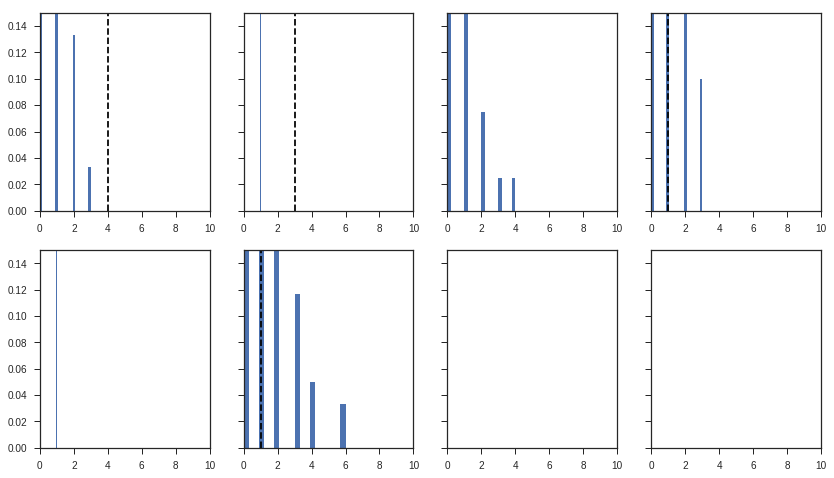

In [29]:
f, axs = plt.subplots(2, 4, sharey=True, figsize=(14, 8))
betti_num =3
for ax, stim in zip(axs.flatten(), bc_tavg.keys()):
    final_bettis = bc_tavg[stim][:, -1, 0]
    #final_bettis = stim_betticurve_dict[stim][-1]
    
    plot_scm_distribution([stim_scm_dict[stim]], 0, betti_num, ax)
    print(final_bettis)
    b = final_bettis[betti_num]
    ax.plot([b, b], [0, 0.15], 'k--')
    #ax.set_title(stim)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 0.15])
plt.savefig(os.path.join('/home/brad/DailyLog/20170814/', 'SCMControlB1083_betti{}.eps'.format(betti_num)))

In [ ]:
#compute pvalues
dims2 = [0,1,2]
for stim in bc_tavg.keys():
    for dim in dims2:
        final_betti = bc_tavg[stim][dim, -1, 0]
        scm_dist = np.array(stim_scm_dict[stim])
        scm_dist = [x[0][dim] for x in scm_dist]
        m = np.mean(scm_dist)
        N = len(scm_dist)
        if final_betti > m:
        
            count = np.sum(np.greater(scm_dist, final_betti))
        else:
            count = np.sum(np.less(scm_dist, final_betti))
        p = 2*(1+count)/(N+1)
        print('Stim: {} dim: {}  pvalue: {}'.format(stim, dim, p))
    print('\n')
    

In [ ]:
np.mean(stim_scm_dict[stim][:, :, 1])

In [ ]:
stim_scm_dict[stim].shape

In [ ]:
np.array(stim_scm_dict[stim]).shape

In [ ]:
test = stim_scm_dict[stim]


In [ ]:
test